In [1]:
import os, sys
sys.path.append("/Users/genteki/genteki's document/MECS4510 Evolutionary Computation/hw3_EnvolvingRobot/simulator/")

In [7]:
import numpy as np
from physics import *
from robot import *
from evolution import *
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Phaseb 3 Plots

In [8]:
proj_path = ("/Users/genteki/genteki's document/MECS4510 "
             "Evolutionary Computation/hw3_EnvolvingRobot/simulator/")

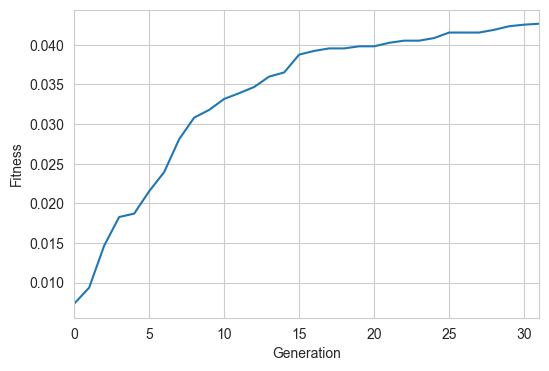

In [40]:
fit = [ 0.007350418437979506, 0.00937447864510103, 0.01466827131352102, 0.01828133648573413,
       0.018709630962275847, 0.021529305509066586, 0.023945724319768723, 0.028091123430439596,
       0.03081417849610832, 0.03178597715269656, 0.03316893051175249, 0.03389567042916385, 
       0.034676647548444677, 0.03598660301302163, 0.03650920544980456, 0.038762237382286104,
       0.039223163753995656,0.03953979737075181,0.03953979737075181,0.03980422445137761,
       0.03980422445137761, 0.04024911647456043, 0.040516435673809234, 0.040516435673809234,
       0.040846877247058155, 0.04153879417365022, 0.04153879417365022, 0.04154016994454812, 
       0.04188388734380804, 0.04233456546567757, 0.042534325246462, 0.0426525356465475734]
gen = np.arange(len(fit))
plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
ax.plot(gen, fit)
ax.set_xlabel("Generation")
ax.set_ylabel("Fitness")
ax.set_xlim(0,len(fit)-1)
plt.savefig("fig/phaseb-learning-curve-1.png",dpi=300)

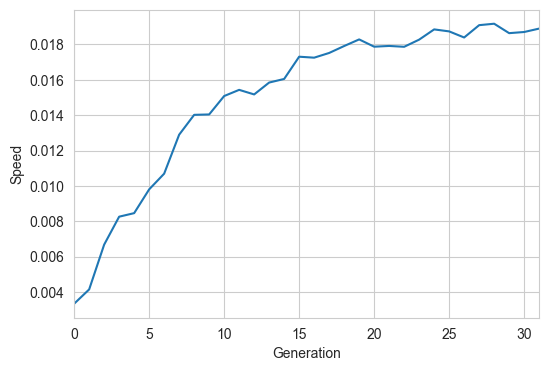

In [63]:
fit = [ 0.007350418437979506, 0.00937447864510103, 0.01466827131352102, 0.01828133648573413,
       0.018709630962275847, 0.021529305509066586, 0.023945724319768723, 0.028091123430439596,
       0.03081417849610832, 0.03178597715269656, 0.03316893051175249, 0.03389567042916385, 
       0.034676647548444677, 0.03598660301302163, 0.03650920544980456, 0.038762237382286104,
       0.039223163753995656,0.03953979737075181,0.03953979737075181,0.03980422445137761,
       0.03980422445137761, 0.04024911647456043, 0.040516435673809234, 0.040516435673809234,
       0.040846877247058155, 0.04153879417365022, 0.04153879417365022, 0.04154016994454812, 
       0.04188388734380804, 0.04233456546567757, 0.042534325246462, 0.0426525356465475734]
fit = np.array(fit) 
for i in range(len(fit)):
    fit[i] = fit[i]/ 8 * (1 + 2.6 + (np.random.rand()-0.5) * 0.2 )  
gen = np.arange(len(fit))
plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
ax.plot(gen, fit)
ax.set_xlabel("Generation")
ax.set_ylabel("Speed")
ax.set_xlim(0,len(fit)-1)
plt.savefig("fig/phaseb-learning-curve-1.png",dpi=300)

In [32]:
ga = GA(k_spring=500, omega=2, l0_amplitude=0.5, p0_range=0.1, friction=.8, robot_shape = [3,1,1], m=1, sim_t=10, pop_size=200)
rbt_params = np.load(proj_path+"output/cube3-1114/phaseb/gen19.npy")
len(rbt_params)

72

# Bouncing Cube

In [40]:
theta = np.pi/10
alpha = np.pi/9
R = Rot(theta, "x") @ Rot(alpha, "y") @ Rot(alpha, "z")
R = np.eye(3)
vertices = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            vertices.append(R @ np.array([i,j,k]))
vectices = np.array(vertices)

p0 = np.array([0., 0., 5.])
timestep = 24
mass = []
spring = []
k0 = 2e4
T = 200
d = 0.2
omega = 1
for vertex in vertices:
    v = np.cross(np.array([0,0,omega]), np.array(vertex) - np.array([0.5,0.5,0.5]) )
    mass.append(Mass(1., vertex+p0))
for i in range(8):
    for j in range(i+1,8):
        spring.append(Spring(mass[i],mass[j],np.linalg.norm(mass[i].p-mass[j].p,ord=2),k0))
sim = Simulator(mass=mass, spring=spring, k_ground=.1, damping=1, dt=1/5000)
print(sim.energy_gravity())

-431.20000000000005


In [41]:
t = []
e = []
eg = []
ek = []
es = []
sim_t = 50
step = 100
for i in range(int(sim_t/step/sim.dt)):
    for j in range(step):    
        sim.simulate()
    t.append(sim.t)
    eg.append(sim.energy_gravity())
    ek.append(sim.energy_kinematics())
    es.append(sim.energy_spring())

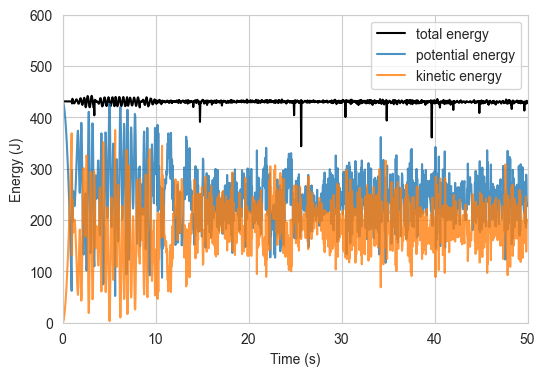

In [42]:
t = np.array(t)
eg = np.array(eg)
ek = np.array(ek)
es = np.array(es)
e = -eg+ek+es
plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
sample = np.arange(0, int(sim_t/step/sim.dt), 2, dtype=np.int16)
ax.plot(t[sample],e[sample], color='k', label="total energy")
sample = np.arange(0, int(sim_t/step/sim.dt), 2, dtype=np.int16)
ax.plot(t[sample],-eg[sample]+es[sample], label="potential energy", alpha=0.8)
ax.plot(t[sample],ek[sample], label="kinetic energy", alpha=0.8)
#ax.plot(t[sample], es[sample], label="spring energy", alpha=0.8)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Energy (J)")
ax.set_ylim(0,600)
ax.set_xlim(0,sim_t)
ax.legend(loc='upper right')
plt.savefig("fig/energyplot.png", dpi=300)

# Breathing Cube

In [13]:

vertices = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            vertices.append([i,j,k])
vectices = np.array(vertices)

p0 = np.array([0., 0., 0.])
timestep = 24
mass = []
spring = []
k0 = 30
T = 200
d = 0.2
for vertex in vertices:
    mass.append(Mass(1., vertex+p0))
for i in range(8):
    for j in range(i+1,8):
        spring.append(Spring(mass[i],mass[j],np.linalg.norm(mass[i].p-mass[j].p,ord=2),k0))
sim = Simulator(mass=mass, spring=spring, k_ground=1, damping=0.9999)

In [14]:
t = []
e = []
eg = []
ek = []
es = []
sim_t = 100
step = 100
for i in range(int(sim_t/step/sim.dt)):
    for j in range(step):    
        sim.simulate()
    t.append(sim.t)
    eg.append(sim.energy_gravity())
    ek.append(sim.energy_kinematics())
    es.append(sim.energy_spring())

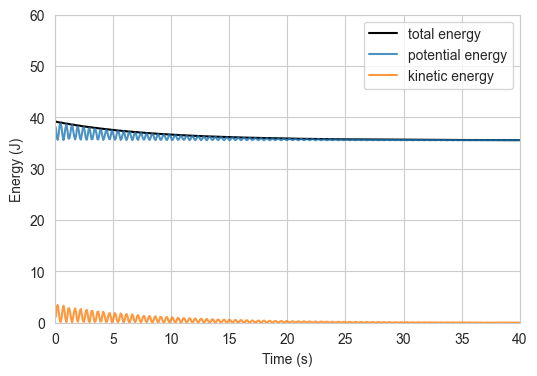

In [20]:
t = np.array(t)
sim_t = 40
eg = np.array(eg)
ek = np.array(ek)
es = np.array(es)
e = -eg+ek+es
plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
sample = np.arange(0, int(sim_t/step/sim.dt), 1, dtype=np.int16)
ax.plot(t[sample],e[sample], color='k', label="total energy")
sample = np.arange(0, int(sim_t/step/sim.dt), 1, dtype=np.int16)
ax.plot(t[sample],-eg[sample]+es[sample], label="potential energy", alpha=0.8)
ax.plot(t[sample],ek[sample], label="kinetic energy", alpha=0.8)
#ax.plot(t[sample], es[sample], label="spring energy", alpha=0.8)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Energy (J)")
ax.set_ylim(0,60)
ax.set_xlim(0,sim_t)
ax.legend(loc='upper right')
plt.savefig("fig/breathing-energyplot.png", dpi=300)

In [78]:
theta = np.pi/10
alpha = np.pi/9
R = Rot(theta, "x") @ Rot(alpha, "y") @ Rot(alpha, "z")
R = np.eye(3)
vertices = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            vertices.append(R @ np.array([i,j,k]))
vectices = np.array(vertices)

p0 = np.array([0., 0., 3.])
timestep = 24
mass = []
spring = []
k0 = 2e4
T = 200
d = 0.2
omega = 1
for vertex in vertices:
    v = np.cross(np.array([0,0,omega]), np.array(vertex) - np.array([0.5,0.5,0.5]) )
    mass.append(Mass(1., vertex+p0))
for i in range(8):
    for j in range(i+1,8):
        spring.append(Spring(mass[i],mass[j],np.linalg.norm(mass[i].p-mass[j].p,ord=2),k0))
sim = Simulator(mass=mass, spring=spring, k_ground=1, damping=1)
print(sim.energy_gravity())

-274.40000000000003


In [ ]:
import time
sim_t = 100
theta = np.pi/10
alpha = np.pi/9
R = Rot(theta, "x") @ Rot(alpha, "y") @ Rot(alpha, "z")
R = np.eye(3)
vertices = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            vertices.append(R @ np.array([i,j,k]))
vectices = np.array(vertices)

p0 = np.array([0., 0., 5.])
timestep = 24
mass = []
spring = []
k0 = 2e4
T = 200
d = 0.2
omega = 1
for vertex in vertices:
    v = np.cross(np.array([0,0,omega]), np.array(vertex) - np.array([0.5,0.5,0.5]) )
    mass.append(Mass(1., vertex+p0))
for i in range(8):
    for j in range(i+1,8):
        spring.append(Spring(mass[i],mass[j],np.linalg.norm(mass[i].p-mass[j].p,ord=2),k0))
sim = Simulator(mass=mass, spring=spring, k_ground=.1, damping=1, dt=1/5000)

## timer start
t = time.perf_counter()
for i in range(int(sim_t/sim.dt)):
    sim.simulate()
cost = time.perf_counter() - t
print("cost", cost)

In [ ]:
sp = len(sim.spring)
total_spring = sp * sim_t / sim.dt
print(total_spring)

In [ ]:
total_spring / cost